# Machine Learning 2023-2024 - UMONS

# Model selection using scikit-learn

**During the last lab, we learned how to fit regression and classification models to a dataset with scikit-learn. However, by fixing the number of features and by fixing the model's hyperparameters beforehand, we restricted ourselves to a single model. By doing so, we omitted to explore a broader range of models, one of which might better explain the relationship between our input and target variables.**

**In this lab, we will experiment with the general methodology of model selection, meaning that we will define a set of predefined models, and we will retain the one that minimizes the out-of-sample error.**

**Import the necessary libraries.**

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

**In this lab, we will work with the [Fish market](https://www.kaggle.com/datasets/vipullrathod/fish-market) dataset, which contains several characteristics about fish, such as their weights, lengths, and species.**

In [60]:
df = pd.read_csv('data/fish_lab.csv', index_col=0)

**1) Print the type of each column and change the type of 'Species' to `category`.**

In [61]:
print(df.dtypes)
df=df.astype({'Species':'category'})
print("-"*40)
print("After changing type of Species column:")
print("-"*40)
print(df.dtypes)

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
----------------------------------------
After changing type of Species column:
----------------------------------------
Species    category
Weight      float64
Length1     float64
Length2     float64
Length3     float64
Height      float64
Width       float64
dtype: object


**We will start by predicting the target 'Height' from the feature 'Weight'. We split the dataset into a training and test set following a 75%/25% partition using the `train_test_split` function. To avoid data leakage, we will not look at the test dataset during model selection.**

In [62]:
X, y = df[['Weight']], df['Height']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, shuffle=True, random_state=1
)

**2) What is the number of missing values? Using the `SimpleImputer` class of scikit-learn with the argument `strategy`, replace the missing values by the sample mean, computed only on the training dataset to avoid data leakage.**

In [63]:
header = "-"*40
print(header)
print("summary of missing values:")
ms = df.isna().sum()
train_ms = X_train.isna().sum()
test_ms = X_test.isna().sum()
y_train_ms = y_train.isna().sum()
y_test_ms = y_test.isna().sum()
print(header)
print(f"in all data set :\n{ms} ,\n{header}\nin training set :\n{train_ms} ,\n{header}\nin test set :\n{test_ms} ,\n{header}\nin y_train :\n {y_train_ms} ,\n{header}\nin y_test :\n{y_test_ms} .")
print(header)
print(f"Missing values are : \n{ms.sum()} in all data set , \n{train_ms.sum()} in training set , \n{test_ms.sum()} in test set , \n{y_train_ms.sum()} in y_train , \n{y_test_ms.sum()} in y_test .")



----------------------------------------
summary of missing values:
----------------------------------------
in all data set :
Species     5
Weight      8
Length1     7
Length2    12
Length3     3
Height      0
Width       5
dtype: int64 ,
----------------------------------------
in training set :
Weight    6
dtype: int64 ,
----------------------------------------
in test set :
Weight    2
dtype: int64 ,
----------------------------------------
in y_train :
 0 ,
----------------------------------------
in y_test :
0 .
----------------------------------------
Missing values are : 
40 in all data set , 
6 in training set , 
2 in test set , 
0 in y_train , 
0 in y_test .


In [64]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
#X_test = imputer.fit_transform(X_test)
print(f" After fit_transform ; they are : \n{np.isnan(X_train).sum()} missing value  in train set X_train")

 After fit_transform ; they are : 
0 missing value  in train set X_train


**3) Generate a scatter plot of the two variables on the training set.**

<Axes: ylabel='Height'>

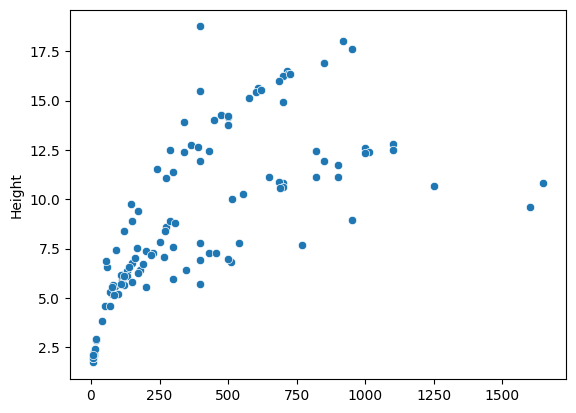

In [65]:
# Créer de nouvelles variables contenant les données aplaties
X_train_flat = X_train.flatten() if X_train.ndim > 1 else X_train
y_train_flat = y_train.flatten() if y_train.ndim > 1 else y_train

# Tracer le scatterplot avec les nouvelles variables
sns.scatterplot(x=X_train_flat, y=y_train_flat)


**4) We can see that a linear model would not be the best option to model the relationship between these variables. Instead of fitting a linear model, let's fit a polynomial model of specified degree.**
- **scikit-learn provides various "transformers", which can transform the dataset for scaling, normalization, encoding categorical variables, filling missing values, and more. To perform polynomial regression, we will use the `PolynomialFeatures` class**.
- **scikit-learn also allows to create pipeline using `Pipeline` or `make_pipeline`, which are compositions of transformers followed by any model. Our polynomial regression model is a pipeline which first creates new features and then fits a linear regression model.**

**More information is available [here](https://scikit-learn.org/stable/data_transforms.html).**

**Create your model using the given `PolynomialRegression` function with `degree=2`.
Observe that, as discussed in class, this is just a linear regression where features are augmented with terms of higher degree!
Then, plot the predictions of the model conditional to 'Weight' between 0 and 1250.**

In [66]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree), LinearRegression(**kwargs))

In [67]:
# Créer une instance du pipeline avec un degré polynomial de 2
pipeline = PolynomialRegression(degree=2,fit_intercept=True)
# Afficher le pipeline pour vérifier ses composants
print(pipeline)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


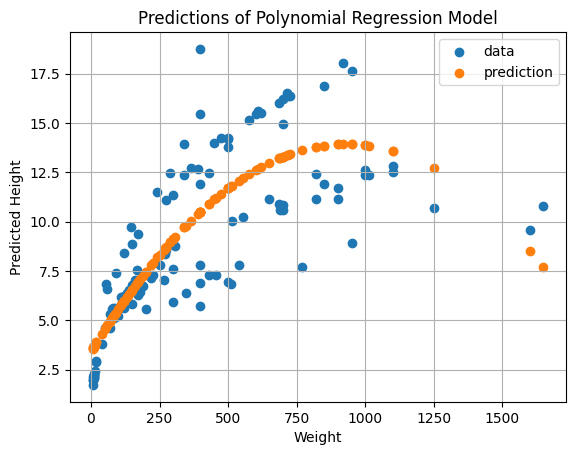

In [68]:

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données d'entrainement
y_pred = pipeline.predict(X_train)
# Visualiser les prédictions conditionnelles à 'Weight' entre 0 et 1250
plt.scatter(X_train[:1250],y_train , label = 'data')
plt.scatter(X_train[:1250], y_pred , label = 'prediction')
plt.xlabel('Weight')
plt.ylabel('Predicted Height')
plt.title('Predictions of Polynomial Regression Model')
plt.legend()
plt.grid(True)
plt.show()

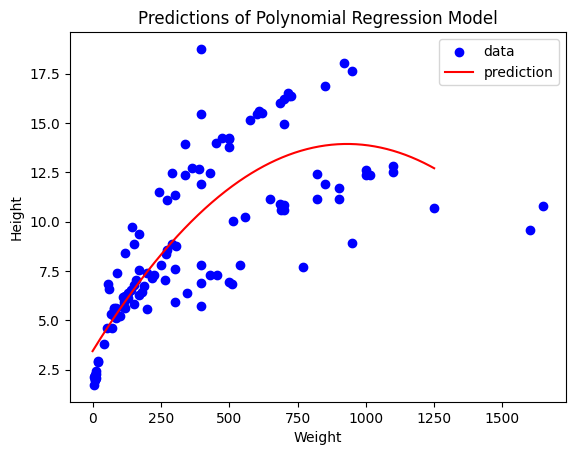

In [69]:
x_plot = np.linspace(0,1250,500).reshape(-1,1)
y_plot = pipeline.predict(x_plot)
plt.scatter(X_train_flat, y_train, label='data',color = 'blue')
plt.plot(x_plot,y_plot , label = 'prediction', color= 'red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Predictions of Polynomial Regression Model')
plt.legend()

**5) We will now evaluate our first model with 10-fold cross-validation using the [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function. In this process, the dataset is divided into 10 folds. For each fold, `cross_validate` will fit the model on the 9 other folds and test it on the remaining fold.**
- **Create a pipeline, composed of the `SimpleImputer` transformer from earlier and a `PolynomialRegression` model with degree 2.**
- **For evaluation, we will use the mean squared error (MSE). Note that scikit-learn provides [different score functions](https://scikit-learn.org/stable/modules/model_evaluation.html), which should be maximized. This is in contrast to loss functions, which should be minimized. Thus, we will use the score `neg_mean_squared_error` (the negation of the MSE), and we should not forget to take the negation when reporting it.**
- **Call `cross_validate` with 10 folds and specify the score function using the `scoring` argument. Since `X_train` and `y_train` have been modified previously with `SimpleImputer`, there will be data leakage between folds. Instead, use the given `X_train_raw` and `y_train_raw` as argument.**
- **Report the test MSE on each fold based on the dictionary of metrics returned by [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). Then, report the mean test MSE across all fold.**

In [70]:
# We recreate the train and test sets because we modified the train set earlier.
X, y = df[['Weight']], df['Height']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, train_size=0.75, test_size=0.25, shuffle=True, random_state=1
)

In [71]:
pip = PolynomialRegression(fit_intercept = True)

dic = cross_validate(pip, X_train_raw, y_train_raw, cv=10 , scoring='neg_mean_squared_error')
print(dic)


{'fit_time': array([0.00774503, 0.01020741, 0.00754809, 0.00924182, 0.00352931,
       0.0038743 , 0.00481987, 0.00290012, 0.00289392, 0.00379944]), 'score_time': array([0.00314569, 0.00442505, 0.00518322, 0.00394249, 0.00172758,
       0.00368905, 0.0016861 , 0.00166011, 0.00164247, 0.00189042]), 'test_score': array([ -5.57185759,  -3.18385178,  -4.90409367,  -2.54956313,
       -13.37038239,  -3.18282654,  -5.12280108,  -6.2753504 ,
        -6.18626227, -13.91583491])}


In [72]:
MSE_on_each_fold = -dic['test_score']
MSE_across_all_fold = MSE_on_each_fold.mean()
print(f"MSE_on_each_fold = {MSE_on_each_fold}")
print(f"MSE_across_all_fold = {MSE_across_all_fold}")


MSE_on_each_fold = [ 5.57185759  3.18385178  4.90409367  2.54956313 13.37038239  3.18282654
  5.12280108  6.2753504   6.18626227 13.91583491]
MSE_across_all_fold = 6.426282373589757


**Let's now see how predictions vary with the model complexity. We go back to using the train and test sets defined earlier. For polynomial degrees between 1 and 10, we repeatedly fit the polynomial regression model (without cross-validation) and plot the predictions of 'Height' in function of the feature 'Weight'. What do you observe?**

c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was f

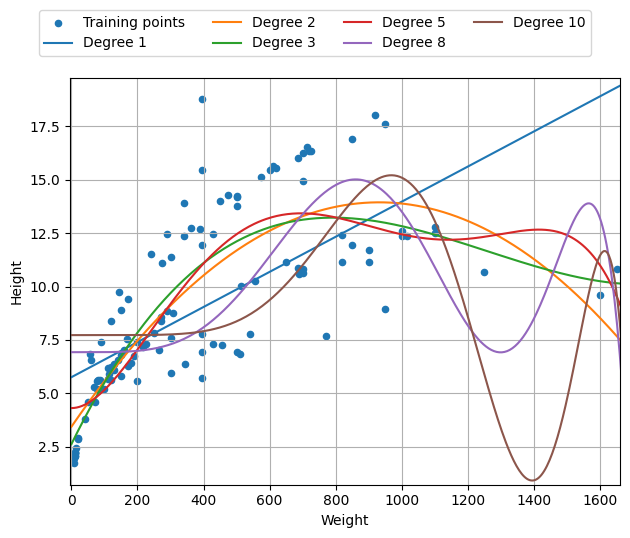

In [73]:
models = []
degrees = [1, 2, 3, 5, 8, 10]
for degree in degrees:
    model = PolynomialRegression(degree, fit_intercept=True)
    model.fit(X_train, y_train)
    models.append(model)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, label='Training points', s=20)
X_plot = pd.DataFrame({'Weight': np.linspace(0, 2000, 500)})
for model in models:
    degree = model.get_params()['polynomialfeatures__degree']
    y_plot = model.predict(X_plot)
    ax.plot(X_plot['Weight'], y_plot, label=f'Degree {degree}')
# Convert X_train back to a pandas DataFrame for compatibility
X_train_df = pd.DataFrame(X_train, columns=['Weight'])

ax.set_xlim([X_train_df['Weight'].min() - 10, X_train_df['Weight'].max() + 10])
ax.set_ylim([y_train.min() - 1, y_train.max() + 1])
ax.set(xlabel='Weight', ylabel='Height')
plt.grid(True)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, 1), frameon=True, ncol=4)
fig.tight_layout()

**6) Collect and plot the evolution of the train and test MSE of the models from the previous question in function of the polynomial degree. Which model would you select?**

c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was f

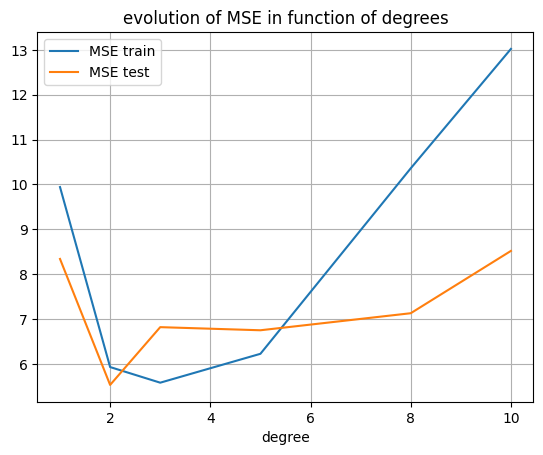

In [74]:
MSE_train , MSE_test = [ ] , [ ]
for model in models:
    y_train_pred , y_test_pred = model.predict(X_train) , model.predict(X_test)
    MSE_train.append(mean_squared_error(y_train,y_train_pred))
    MSE_test.append(mean_squared_error(y_test,y_test_pred))
plt.plot(degrees , MSE_train , label ='MSE train')
plt.plot(degrees , MSE_test , label ='MSE test')
plt.xlabel('degree')
plt.title('evolution of MSE in function of degrees')
plt.legend()
plt.grid(True)
plt.show()

The polynomial of degree 2 achieves the lowest test MSE and should be selected.

**In the rest of this lab, we will predict the target 'Height' based on all available features. We split again the dataset into a training and test set following a 75/25 partition using the `train_test_split` function.**

In [75]:
X, y = df.drop(columns='Height'), df[['Height']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, shuffle=True, random_state=1
)

**7) We will now create a more complex pipeline to preprocess the data:**
- **For continuous variables, we replace the missing values by the sample mean.**
- **For missing categorical variables, replace missing values by the sample mode (the most frequent value).**
- **After replacing missing categorical variables, we replace them by dummy variables using the `OneHotEncoder`.**
- **To execute different transformers on different columns, we can use `ColumnTransformer`**

**For this, combine the transformers `SimpleImputer`, `OneHotEncoder` and `ColumnTransformer` into a single pipeline.**

In [76]:
# We can select continuous and categorical columns using this method
cont_columns = X_train.select_dtypes(include=['float64']).columns
cat_columns = X_train.select_dtypes(include=['category']).columns
print('Continuous columns:', cont_columns)
print('Categorical columns:', cat_columns)

Continuous columns: Index(['Weight', 'Length1', 'Length2', 'Length3', 'Width'], dtype='object')
Categorical columns: Index(['Species'], dtype='object')


In [77]:
# Transformers for imputation
cont_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_pipeline = make_pipeline(cat_imputer, OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# ColumnTransformer to apply transformations to the correct features
preprocessor = ColumnTransformer(transformers=[
    ('cont', cont_imputer, cont_columns),
    ('cat', cat_pipeline, cat_columns)
])

**8) Usually, models have more than one hyperparameter that can be tuned in order to find the model that best captures the relationship between our input and target variables. For instance, in the case of a simple linear regression using a polynomial transformation on the input variables, we can choose the hyperparameter space to be the polymial's degree, and whether or not to fit the intercept. Inspecting each combination of hyperparameters and selecting the combination that results in the best model is called grid search.**

**scikit-learn provides the class [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), which evaluates each combination of hyperparameters using cross-validation. After fitting, we can get relevant attributes:**
- **`cv_results_` is a summary of the results and can be converted to a pandas dataframe`.**
- **`best_index_` is the index of `cv_results_` for the best model.**
- **`best_params_` is the parameters of the best model.**

**Perform a grid search on the hyperparameter space of a polynomial regression model (with all features). Search for degrees varying between 1 and 5, and whether or not the intercept should be fit. Report the best hyperparameters and the corresponding MSE.**

In [89]:
#Pip = Pipeline(steps=[('preprocessor',preprocessor) ,  ('polynomialfeatures',PolynomialFeatures()),('linearregression',LinearRegression())])

Pip = make_pipeline(preprocessor,PolynomialFeatures(),LinearRegression())

In [93]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],  # Tester des polynômes de degré 1 à 5
    'linearregression__fit_intercept': [True, False]  # Tester avec ou sans interception
}

In [91]:
grid_search = GridSearchCV(estimator=Pip, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

In [92]:
# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Print the results
print(grid_search.cv_results_)
print("-"*120)
print(grid_search.best_index_)
print("-"*120)
print(grid_search.best_params_)

{'mean_fit_time': array([0.01670444, 0.01901219, 0.0272305 , 0.0620317 , 0.63032851,
       0.03128138, 0.02604327, 0.03069935, 0.07517154, 0.65362577]), 'std_fit_time': array([0.00119468, 0.00293844, 0.00471223, 0.02921907, 0.13917694,
       0.00714804, 0.00716822, 0.00838854, 0.03518221, 0.21657705]), 'mean_score_time': array([0.01089993, 0.01123564, 0.01357772, 0.01669784, 0.02223244,
       0.01706314, 0.01500404, 0.01462259, 0.02076955, 0.01525366]), 'std_score_time': array([0.00102232, 0.0006042 , 0.00366014, 0.00285669, 0.00608466,
       0.00350484, 0.00215614, 0.00309895, 0.0080564 , 0.00582606]), 'param_linearregression__fit_intercept': masked_array(data=[True, True, True, True, True, False, False, False,
                   False, False],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=True), 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
             mask=[F

In [82]:
print(grid_search.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont', SimpleImputer(),
                                                  Index(['Weight', 'Length1', 'Length2', 'Length3', 'Width'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Species'], dtype='object'))])),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_

Perhaps surprisingly, the best score seems obtained with a polynomial of degree 1. Although introducing more features offers greater flexibility to the model, it also raises the chance of the model fitting to noise within the features - an indication of overfitting.

**9) Finally, fit a model using the best hyperparameters on the full training dataset. You can use the function `set_params` of scikit-learn [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) classes. Collect the predictions on the test set in a variable `y_pred` and report the test MSE.**

In [83]:
# selectionner le meilleur modèle
best_model = grid_search.best_estimator_
# prédiction sur le test set avec le meilleur modèle
y_pred = best_model.predict(X_test)

In [84]:
# calcul de la mse sur les données de test
mse_test = mean_squared_error(y_test,y_pred)
print("MSE on test set = ", mse_test)

MSE on test set =  1.0561976085103097


We observe that the MSE decreases when the full training dataset is available.

**For visualization, we plot the predicted values of 'Height' as a function 'Weight' (ignoring the other predictors on the plot). Note that, due to the presence of other variables, the model is able to represent non-linear relationships between the two variables.**

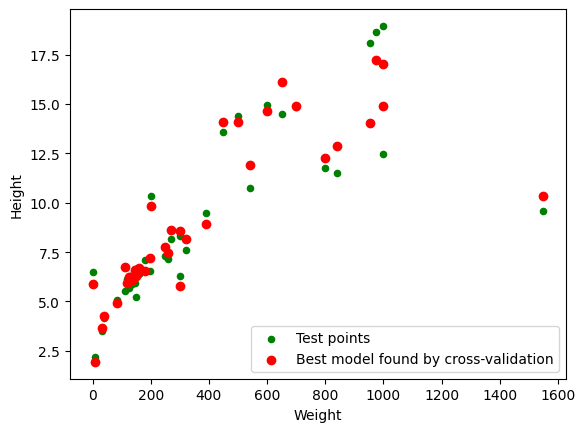

In [85]:
# We sort according to the x-axis for visualization purposes
x_label = 'Weight'
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)
X_test = X_test.sort_values(x_label)
y_test = y_test.loc[X_test.index]
y_pred = y_pred[X_test.index]

fig, ax = plt.subplots()
ax.scatter(X_test[x_label], y_test, color='green', label='Test points', s=20)
ax.scatter(X_test[x_label], y_pred, label='Best model found by cross-validation', color='r')
ax.set(xlabel=x_label, ylabel='Height')
ax.legend()

**Optional experiments: try to improve the performance of the model by manually transforming the features. For example add the squared 'Weight' as a feature.**